In [10]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import *
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [15]:
#read crop fiile
df = pd.read_csv('crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
#dataset statistics
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


##EDA

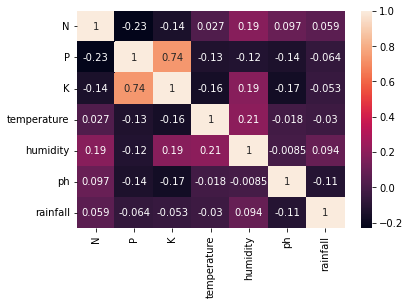

In [ ]:
#dataset varaibles correlation
sns.heatmap(df.corr(),annot=True)

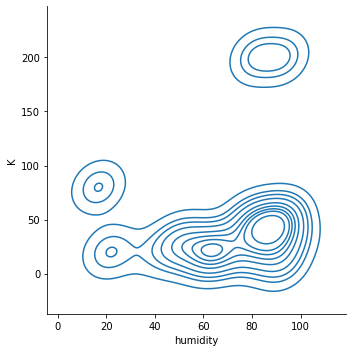

In [ ]:
#distribution plot humidity vs K
g = sns.displot(data=df, x="humidity", y="K", kind='kde')

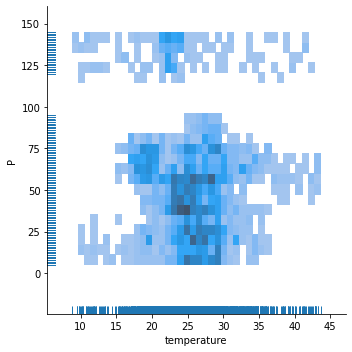

In [ ]:
#distribution plot temperature vs P
g = sns.displot(data=df, x="temperature", y="P", rug=True)

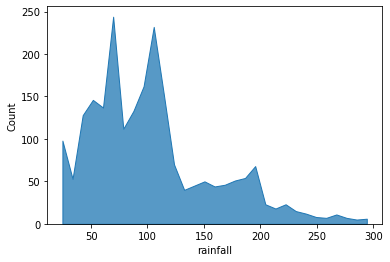

In [ ]:
#histogram plot rainfall vs count
sns.histplot(df, x="rainfall",element="poly")

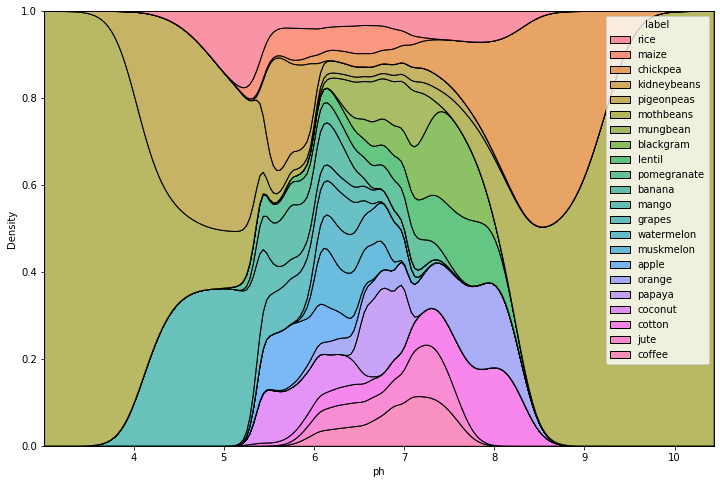

In [ ]:
#ph distribution wrt to crop
fig,ax = plt.subplots(1,1, figsize=(12,8))
sns.kdeplot(data=df, x="ph", hue="label", multiple="fill")


##Modelling

In [18]:
#seperate dependent and independent variables
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [19]:
#encode target attribute
lblenc = LabelEncoder()
ohe = OneHotEncoder()
y = lblenc.fit_transform(y.reshape(-1, 1))
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [20]:
lblenc.classes_, lblenc.transform(lblenc.classes_)

(array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]))

In [21]:
print(ohe.transform(lblenc.transform(lblenc.classes_).reshape(-1, 1)))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0


In [22]:
#split data into train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#normalize the independent data to mean 0 and var 1
scaler = StandardScaler()
sc = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("features mean : {}   \nfeatures std : {}".format(scaler.mean_, scaler.var_))

features mean : [ 50.68636364  53.40965909  48.13636364  25.57963982  71.55999729
   6.47593982 102.66125502]   
features std : [1.39034481e+03 1.10348388e+03 2.60749277e+03 2.58940867e+01
 4.84781389e+02 5.97877421e-01 3.01800594e+03]


##ANN

In [ ]:
#create a ANN model
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train[1].shape))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Add the output layer
ann.add(tf.keras.layers.Dense(units=22, activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 22)                374       
                                                                 
Total params: 3,494
Trainable params: 3,494
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoiter = tf.keras.callbacks.ModelCheckpoint('ann.h5', verbose = 1, save_best_only = True,  monitor='val_loss', mode='min')
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)


In [ ]:
history = ann.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), 
                  callbacks=[checkpoiter, early_stop, reduce_lr])


Epoch 1/100
27/28 [===========================>..] - ETA: 0s - loss: 2.9872 - accuracy: 0.1227 
Epoch 1: val_loss improved from inf to 2.86984, saving model to ann.h5
28/28 [==============================] - 1s 14ms/step - loss: 2.9842 - accuracy: 0.1267 - val_loss: 2.8698 - val_accuracy: 0.2114 - lr: 0.0010
Epoch 2/100
25/28 [=========================>....] - ETA: 0s - loss: 2.7189 - accuracy: 0.2887
Epoch 2: val_loss improved from 2.86984 to 2.53345, saving model to ann.h5
28/28 [==============================] - 0s 8ms/step - loss: 2.6984 - accuracy: 0.2943 - val_loss: 2.5334 - val_accuracy: 0.2886 - lr: 0.0010
Epoch 3/100
25/28 [=========================>....] - ETA: 0s - loss: 2.3272 - accuracy: 0.3681
Epoch 3: val_loss improved from 2.53345 to 2.11882, saving model to ann.h5
28/28 [==============================] - 0s 9ms/step - loss: 2.3104 - accuracy: 0.3733 - val_loss: 2.1188 - val_accuracy: 0.4205 - lr: 0.0010
Epoch 4/100
24/28 [========================>.....] - ETA: 0s - los

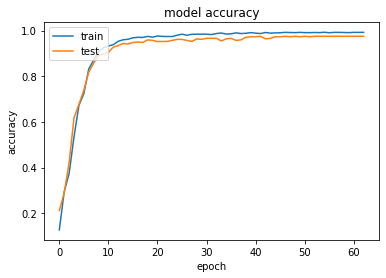

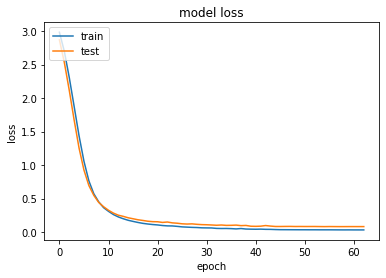

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**Testing**

In [ ]:
#load model
reconstructed_model = tf.keras.models.load_model("ann.h5")

#predict output
y_pred = reconstructed_model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
#decode predicted output
y_test = lblenc.inverse_transform(y_test)
y_pred = lblenc.inverse_transform(y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.96      0.92        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

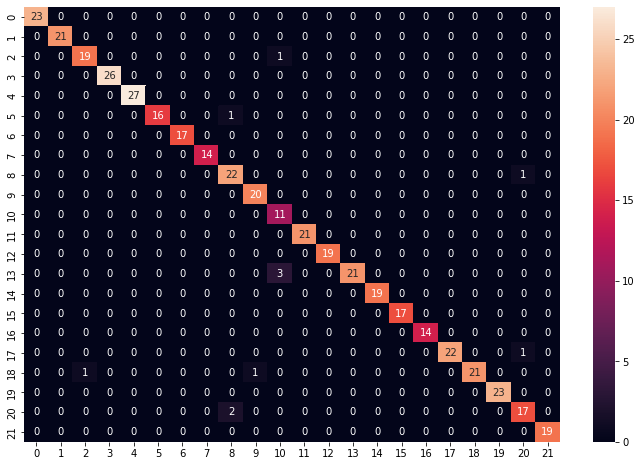

In [ ]:
#confusion matrix
fig,ax = plt.subplots(1,1, figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True) # font size


##Voting Classifier

In [24]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier


In [30]:
clf1 = MLPClassifier(max_iter=1000)
clf2 = LogisticRegression(max_iter = 1000)
clf3 = CatBoostClassifier(logging_level='Silent')
clf4 = RandomForestClassifier()
clf5 = DecisionTreeClassifier()
clf6 = GaussianNB()
clf7 = AdaBoostClassifier()

In [32]:
#seperate dependent and independent variables
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

#encode target attribute
lblenc = LabelEncoder()
y = lblenc.fit_transform(y.reshape(-1, 1))

#split data into train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize the independent data to mean 0 and var 1
scaler = StandardScaler()
sc = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("features mean : {}   \nfeatures std : {}".format(scaler.mean_, scaler.var_))

features mean : [ 50.68636364  53.40965909  48.13636364  25.57963982  71.55999729
   6.47593982 102.66125502]   
features std : [1.39034481e+03 1.10348388e+03 2.60749277e+03 2.58940867e+01
 4.84781389e+02 5.97877421e-01 3.01800594e+03]


In [33]:
eclf1 = VotingClassifier(estimators=[('MLP', clf1), ('Logistic', clf2), ('CatBoost', clf3),
                          ('RF', clf4), ('DT', clf5), ('GNB', clf6), ('Ada', clf7)], 
                         voting='soft')
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('MLP', MLPClassifier(max_iter=1000)),
                             ('Logistic', LogisticRegression(max_iter=1000)),
                             ('CatBoost',
                              <catboost.core.CatBoostClassifier object at 0x7fdbd31f5c90>),
                             ('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('GNB', GaussianNB()),
                             ('Ada', AdaBoostClassifier())],
                 voting='soft')

In [34]:
y_pred = eclf1.predict(X_test)

In [35]:
#decode predicted output
y_test = lblenc.inverse_transform(y_test)
y_pred = lblenc.inverse_transform(y_pred)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

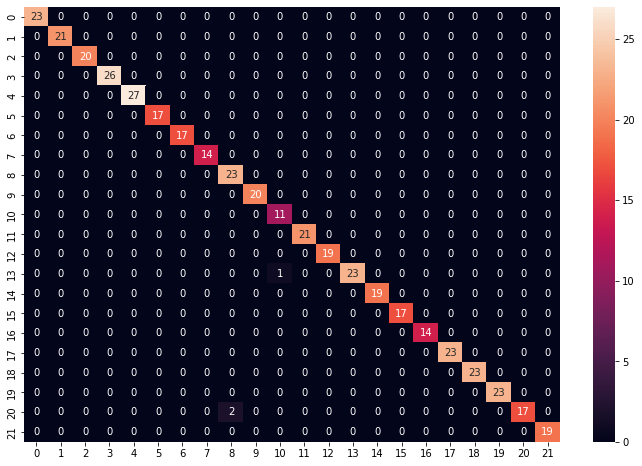

In [37]:
#confusion matrix
fig,ax = plt.subplots(1,1, figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True) # font size
